### First Steps with Convolution Neural Network

This script will help you build your first CNN model.

In [1]:
## Load Libraries

import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## load files
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [3]:
train.head()

image_id    label
0  train_1a     rice
1  train_1b    candy
2  train_1c      jam
3  train_1d   coffee
4  train_2a  vinegar

In [4]:
print ('The train data has {} images.'.format(train.shape[0]))
print ('The test data has {} images.'.format(test.shape[0]))

The train data has 3215 images.
The test data has 1732 images.


In [5]:
# unique label count
print ('The train data has {} unique labels'.format(train['label'].nunique()))

The train data has 25 unique labels


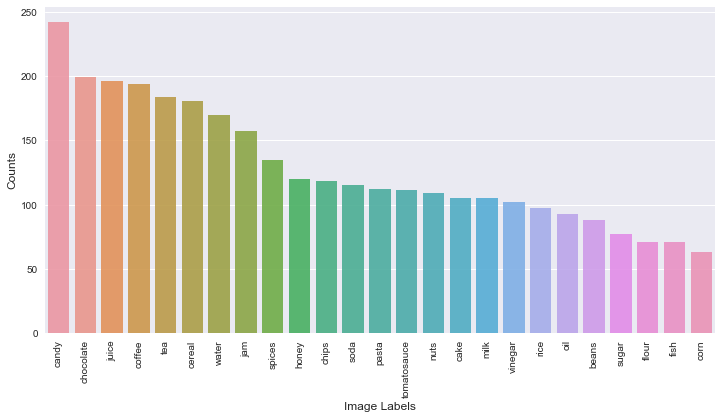

In [6]:
# lets see the distribution

label_counts = train.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [7]:
# set path to read train and test image
TRAIN_PATH = 'Data/train_img/'
TEST_PATH = 'Data/test_img/'

In [8]:
# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64,64)) # you can resize to  (128,128) or (256,256)
    return img

In [9]:
train_data = []
test_data = []
train_labels = train['label'].values

for img in tqdm(train['image_id'].values):
    train_data.append(read_image(TRAIN_PATH + '{}.png'.format(img)))
    
for img in tqdm(test['image_id'].values):
    test_data.append(read_image(TEST_PATH + '{}.png'.format(img)))

100%|█████████████████████████████████████| 1732/1732 [00:06<00:00, 252.70it/s]


In [10]:
# normalize the images
x_train = np.array(train_data, np.float32) / 255.
x_test = np.array(test_data, np.float32) / 255.

In [11]:
# target variable - encoding numeric value
label_list = train['label'].tolist()
Y_train = {k:v+1 for v,k in enumerate(set(label_list))}
y_train = [Y_train[k] for k in label_list]                                      

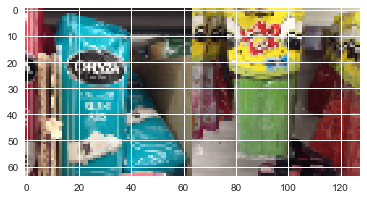

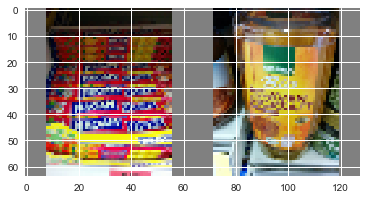

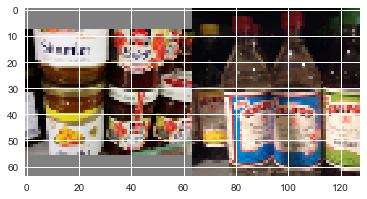

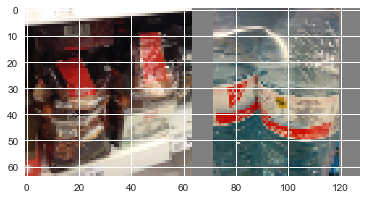

In [12]:
# check some images
def show_images(ix):
    image_train = read_image(TRAIN_PATH + train.image_id[ix] + '.png')
    image_test = read_image(TEST_PATH + test.image_id[ix] + '.png')
    
    pair = np.concatenate((image_train, image_test), axis=1)
    
    plt.figure(figsize = (6,6))
    plt.imshow(pair)
    
# first 4 images in train and test set
for idx in range(4):
    show_images(idx)

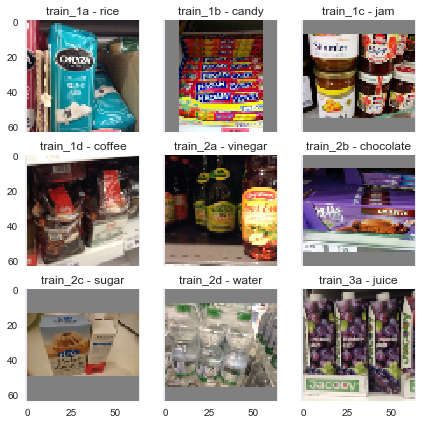

In [13]:
## just images doesn't help, lets see the images with their respective labels
plt.rc('axes', grid=False)

_, axs = plt.subplots(3,3, sharex = 'col', sharey='row', figsize = (7,7))
axs = axs.ravel()

# lets see first 8 images - you can increase i value to see more images
for i, (image_name, label) in enumerate(zip(train.image_id, train.label)):
    if i <= 8:
        img = read_image(TRAIN_PATH + image_name + '.png')
        axs[i].imshow(img)
        axs[i].set_title('{} - {}'.format(image_name, label))
    else:
        break

In [14]:
# lets train our first model, we'll use keras.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


In [15]:
## keras accepts target variable as a ndarray so that we can set one output neuron per class
y_train = to_categorical(y_train)

In [16]:
## neural net architechture

model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (64,64,3))) # if you resize the image above, shape would be (128,128,3)
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

In [18]:
model.fit(x_train, y_train, batch_size=10, epochs=10, validation_split=0.3, callbacks=[early_stops])

Train on 2250 samples, validate on 965 samples
Epoch 1/10
2250/2250 [==============================] - ETA: 791s - loss: 3.2604 - acc: 0.0000e+0 - ETA: 400s - loss: 3.2570 - acc: 0.0000e+0 - ETA: 201s - loss: 3.2602 - acc: 0.0250    - ETA: 135s - loss: 3.2678 - acc: 0.066 - ETA: 102s - loss: 3.2602 - acc: 0.050 - ETA: 82s - loss: 3.2740 - acc: 0.040 - ETA: 69s - loss: 3.2696 - acc: 0.06 - ETA: 59s - loss: 3.2686 - acc: 0.05 - ETA: 52s - loss: 3.2674 - acc: 0.05 - ETA: 46s - loss: 3.2653 - acc: 0.05 - ETA: 42s - loss: 3.2651 - acc: 0.05 - ETA: 38s - loss: 3.2624 - acc: 0.05 - ETA: 35s - loss: 3.2616 - acc: 0.05 - ETA: 33s - loss: 3.2584 - acc: 0.05 - ETA: 30s - loss: 3.2478 - acc: 0.05 - ETA: 29s - loss: 3.2405 - acc: 0.06 - ETA: 27s - loss: 3.2387 - acc: 0.05 - ETA: 25s - loss: 3.2456 - acc: 0.05 - ETA: 24s - loss: 3.2469 - acc: 0.05 - ETA: 23s - loss: 3.2462 - acc: 0.05 - ETA: 21s - loss: 3.2457 - acc: 0.04 - ETA: 20s - loss: 3.2451 - acc: 0.05 - ETA: 19s - loss: 3.2449 - acc: 0.05 - 

2250/2250 [==============================] - ETA: 7s - loss: 3.2956 - acc: 0.100 - ETA: 6s - loss: 3.1659 - acc: 0.100 - ETA: 6s - loss: 3.2158 - acc: 0.080 - ETA: 6s - loss: 3.2081 - acc: 0.071 - ETA: 6s - loss: 3.2127 - acc: 0.066 - ETA: 6s - loss: 3.1996 - acc: 0.072 - ETA: 6s - loss: 3.1911 - acc: 0.069 - ETA: 6s - loss: 3.2009 - acc: 0.060 - ETA: 6s - loss: 3.2016 - acc: 0.052 - ETA: 6s - loss: 3.2074 - acc: 0.052 - ETA: 6s - loss: 3.2047 - acc: 0.052 - ETA: 6s - loss: 3.2121 - acc: 0.052 - ETA: 6s - loss: 3.2072 - acc: 0.052 - ETA: 6s - loss: 3.2055 - acc: 0.055 - ETA: 6s - loss: 3.2091 - acc: 0.055 - ETA: 6s - loss: 3.2067 - acc: 0.061 - ETA: 6s - loss: 3.2044 - acc: 0.063 - ETA: 5s - loss: 3.2009 - acc: 0.065 - ETA: 5s - loss: 3.1929 - acc: 0.070 - ETA: 5s - loss: 3.1902 - acc: 0.066 - ETA: 5s - loss: 3.1936 - acc: 0.068 - ETA: 5s - loss: 3.1847 - acc: 0.067 - ETA: 5s - loss: 3.1812 - acc: 0.066 - ETA: 5s - loss: 3.1764 - acc: 0.066 - ETA: 5s - loss: 3.1841 - acc: 0.067 - ETA: 

2250/2250 [==============================] - ETA: 8s - loss: 3.0307 - acc: 0.100 - ETA: 7s - loss: 3.1256 - acc: 0.033 - ETA: 7s - loss: 3.2114 - acc: 0.040 - ETA: 6s - loss: 3.1917 - acc: 0.057 - ETA: 6s - loss: 3.2266 - acc: 0.055 - ETA: 6s - loss: 3.2012 - acc: 0.054 - ETA: 6s - loss: 3.1954 - acc: 0.053 - ETA: 6s - loss: 3.1834 - acc: 0.066 - ETA: 6s - loss: 3.1748 - acc: 0.070 - ETA: 6s - loss: 3.1696 - acc: 0.073 - ETA: 6s - loss: 3.1600 - acc: 0.076 - ETA: 6s - loss: 3.1557 - acc: 0.069 - ETA: 6s - loss: 3.1419 - acc: 0.084 - ETA: 6s - loss: 3.1384 - acc: 0.081 - ETA: 6s - loss: 3.1370 - acc: 0.075 - ETA: 6s - loss: 3.1377 - acc: 0.077 - ETA: 6s - loss: 3.1497 - acc: 0.075 - ETA: 5s - loss: 3.1514 - acc: 0.077 - ETA: 5s - loss: 3.1534 - acc: 0.078 - ETA: 5s - loss: 3.1580 - acc: 0.076 - ETA: 5s - loss: 3.1584 - acc: 0.075 - ETA: 5s - loss: 3.1591 - acc: 0.076 - ETA: 5s - loss: 3.1600 - acc: 0.077 - ETA: 5s - loss: 3.1598 - acc: 0.074 - ETA: 5s - loss: 3.1643 - acc: 0.075 - ETA: 

2250/2250 [==============================] - ETA: 8s - loss: 3.2213 - acc: 0.0000e+0 - ETA: 7s - loss: 3.2226 - acc: 0.0000e+0 - ETA: 6s - loss: 3.1745 - acc: 0.0400    - ETA: 6s - loss: 3.1575 - acc: 0.028 - ETA: 6s - loss: 3.2043 - acc: 0.033 - ETA: 6s - loss: 3.1826 - acc: 0.063 - ETA: 6s - loss: 3.1745 - acc: 0.084 - ETA: 6s - loss: 3.1812 - acc: 0.073 - ETA: 6s - loss: 3.1806 - acc: 0.070 - ETA: 6s - loss: 3.1765 - acc: 0.068 - ETA: 6s - loss: 3.1818 - acc: 0.066 - ETA: 6s - loss: 3.1820 - acc: 0.073 - ETA: 6s - loss: 3.1735 - acc: 0.068 - ETA: 6s - loss: 3.1848 - acc: 0.063 - ETA: 6s - loss: 3.1789 - acc: 0.069 - ETA: 6s - loss: 3.1802 - acc: 0.067 - ETA: 5s - loss: 3.1761 - acc: 0.069 - ETA: 5s - loss: 3.1768 - acc: 0.065 - ETA: 5s - loss: 3.1746 - acc: 0.064 - ETA: 5s - loss: 3.1757 - acc: 0.061 - ETA: 5s - loss: 3.1726 - acc: 0.063 - ETA: 5s - loss: 3.1731 - acc: 0.060 - ETA: 5s - loss: 3.1724 - acc: 0.060 - ETA: 5s - loss: 3.1686 - acc: 0.063 - ETA: 5s - loss: 3.1634 - acc: 0

2250/2250 [==============================] - ETA: 8s - loss: 3.1214 - acc: 0.0000e+0 - ETA: 6s - loss: 3.2513 - acc: 0.0667    - ETA: 6s - loss: 3.2361 - acc: 0.040 - ETA: 6s - loss: 3.2428 - acc: 0.042 - ETA: 6s - loss: 3.2006 - acc: 0.066 - ETA: 6s - loss: 3.1671 - acc: 0.063 - ETA: 6s - loss: 3.1716 - acc: 0.069 - ETA: 6s - loss: 3.1748 - acc: 0.066 - ETA: 6s - loss: 3.1613 - acc: 0.064 - ETA: 6s - loss: 3.1597 - acc: 0.073 - ETA: 6s - loss: 3.1687 - acc: 0.071 - ETA: 6s - loss: 3.1783 - acc: 0.069 - ETA: 6s - loss: 3.1763 - acc: 0.072 - ETA: 6s - loss: 3.1765 - acc: 0.070 - ETA: 6s - loss: 3.1815 - acc: 0.065 - ETA: 6s - loss: 3.1860 - acc: 0.067 - ETA: 5s - loss: 3.1915 - acc: 0.063 - ETA: 5s - loss: 3.1955 - acc: 0.060 - ETA: 5s - loss: 3.1979 - acc: 0.059 - ETA: 5s - loss: 3.2008 - acc: 0.056 - ETA: 5s - loss: 3.1950 - acc: 0.058 - ETA: 5s - loss: 3.1970 - acc: 0.058 - ETA: 5s - loss: 3.1966 - acc: 0.057 - ETA: 5s - loss: 3.1968 - acc: 0.055 - ETA: 5s - loss: 3.1899 - acc: 0.060

In [19]:
# make prediction
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis= 1)

In [20]:
# get predicted labels
y_maps = dict()
y_maps = {v:k for k, v in Y_train.items()}
pred_labels = [y_maps[k] for k in predictions]

In [21]:
# make submission
sub1 = pd.DataFrame({'image_id':test.image_id, 'label':pred_labels})
sub1.to_csv('sub_one.csv', index=False)

I see this product is candy


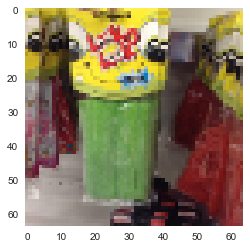

I see this product is candy


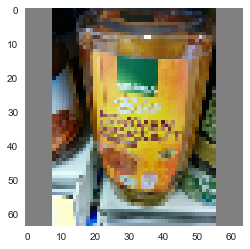

I see this product is candy


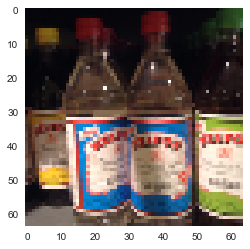

I see this product is candy


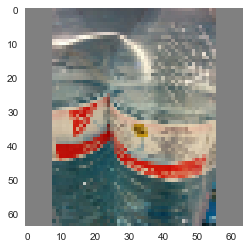

I see this product is candy


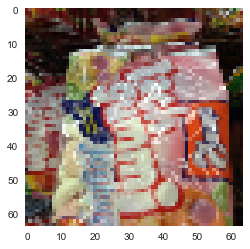

In [22]:
## lets see what our classifier predicts on test images

# top 5 predictions
for i in range(5):
    print('I see this product is {}'.format(pred_labels[i]))
    plt.imshow(read_image(TEST_PATH +'{}.png'.format(test.image_id[i])))
    plt.show()